In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

%matplotlib inline

In [3]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [4]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

open('names/yob2011.txt','r').readlines()[:10]

In [6]:
names2011 = pd.read_csv('names/yob2011.txt', names=['name', 'sex', 'number'] )
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


Read data file of all years

In [8]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)

In [9]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [11]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [12]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [13]:
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
    Aaden     2009       5
    Aadhira   2012       6
              2013      10
              2014      13
    Aadhya    2007      10
              2008       9
              2009      18
              2010      19
              2011      52
              2012     110
              2013     172
              2014     249
    Aadi      2006       5
              2012       5
              2013       6
    Aadison   2009       6
              2012       5
    Aaditri   2010       5
              2012       5
              2013       6
              2014      10
    Aadrika   2013       5
              2014       5
    Aadvika   2013       6
              2014       7
...                    ...
M   Zyshawn   2008      14
              2009       7
              2010       9
              2011       5
              2012      10
              2013      13
              2014       6
    Zyshon    1998       8
              2001       6
              2005       5
    Zyshonne  1998      26
              1999      30
              2000      17
              2001      12
              2002       9
              2003       7
    Zytaevius 2012       5
    Zytaveon  2011       8
              2014       7
    Zytavion  2011       5
    Zytavious 2002       6
              2004       6
              2005       5
              2006       7
              2007       6
              2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [14]:
allyears_indexed.loc['F','Mary']

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
1885,9128
1886,9890
1887,9888
1888,11754


In [15]:
def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]
    
    pp.plot(data.index,data.values)

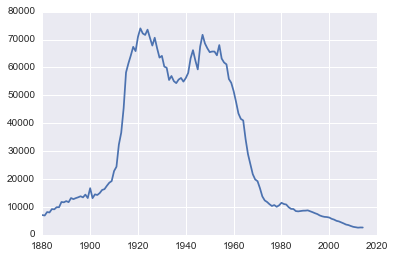

In [17]:
plotname('F', 'Mary')

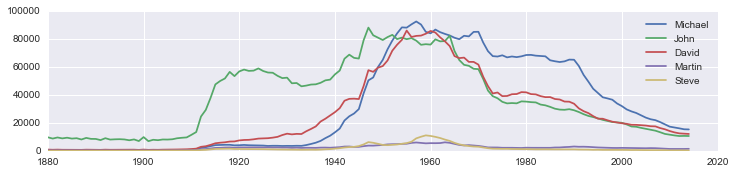

In [21]:
pp.figure(figsize=(12,2.5))

names = ['Michael','John','David','Martin', 'Steve']

for name in names:
    plotname('M',name)

pp.legend(names)

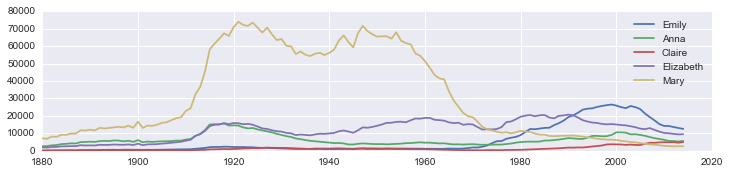

In [22]:
pp.figure(figsize=(12,2.5))

names = ['Emily','Anna','Claire','Elizabeth','Mary']

for name in names:
    plotname('F',name)

pp.legend(names)

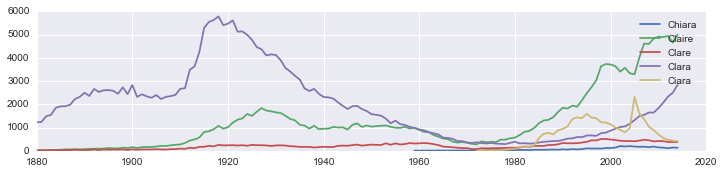

In [23]:
pp.figure(figsize=(12,2.5))

names = ['Chiara','Claire','Clare','Clara','Ciara']

for name in names:
    plotname('F',name)

pp.legend(names)

In [24]:
allyears_indexed.loc['F'].loc[names].head()

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12

In [25]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).head()

number                         
name Chiara Ciara Claire Clara Clare
year                                
1880    NaN   NaN     21  1226    15
1881    NaN   NaN     23  1242    20
1882    NaN   NaN     30  1490    21
1883    NaN   NaN     38  1548    22
1884    NaN   NaN     33  1852    38

In [26]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

number                         
name Chiara Ciara Claire Clara Clare
year                                
1880      0     0     21  1226    15
1881      0     0     23  1242    20
1882      0     0     30  1490    21
1883      0     0     38  1548    22
1884      0     0     33  1852    38

In [27]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

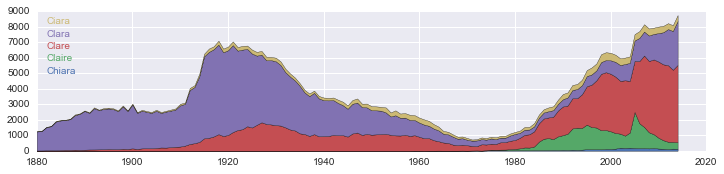

In [29]:
pp.figure(figsize=(12,2.5))

palette = seaborn.color_palette()
pp.stackplot(variants.index,variants.values.T,colors=palette)

for i,name in enumerate(names):
    pp.text(1882,5000 + 800*i,name,color=palette[i])

In [33]:
pop2008 = allyears_indexed.loc['M',:,2008].sort_values(by='number',ascending=False).head()

In [34]:
pop2008.reset_index().drop(['sex','year','number'],axis=1).head()

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [41]:
def topten(sex,year):
    simple = allyears_indexed.loc[sex,:,year].sort_values(by='number',ascending=False).reset_index()
    simple = simple.drop(['sex','year','number'],axis=1).head(10)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [42]:
topten('M',2009)

,2009
1,Jacob
2,Ethan
3,Michael
4,Alexander
5,William
6,Joshua
7,Daniel
8,Jayden
9,Noah
10,Christopher


In [43]:
def toptens(sex,year0,year1):
    years = [topten(sex,year) for year in range(year0,year1+1)]
    
    return years[0].join(years[1:])

In [46]:
toptens('M',2004,2014)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Noah,Noah
2,Michael,Michael,Michael,Michael,Michael,Ethan,Ethan,Mason,Mason,Liam,Liam
3,Joshua,Joshua,Joshua,Ethan,Ethan,Michael,Michael,William,Ethan,Jacob,Mason
4,Matthew,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden,Jayden,Noah,Mason,Jacob
5,Ethan,Ethan,Matthew,Daniel,Daniel,William,William,Noah,William,William,William
6,Andrew,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander,Michael,Liam,Ethan,Ethan
7,Daniel,Daniel,Andrew,Anthony,William,Daniel,Noah,Ethan,Michael,Michael,Michael
8,William,Anthony,Christopher,William,Anthony,Jayden,Daniel,Alexander,Jayden,Alexander,Alexander
9,Joseph,Joseph,Anthony,Matthew,Christopher,Noah,Aiden,Aiden,Alexander,Jayden,James
10,Christopher,Christopher,William,Andrew,Matthew,Christopher,Anthony,Daniel,Aiden,Daniel,Daniel


In [47]:
toptens('F',2004,2014)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Emily,Emily,Emily,Emily,Emma,Isabella,Isabella,Sophia,Sophia,Sophia,Emma
2,Emma,Emma,Emma,Isabella,Isabella,Emma,Sophia,Isabella,Emma,Emma,Olivia
3,Madison,Madison,Madison,Emma,Emily,Olivia,Emma,Emma,Isabella,Olivia,Sophia
4,Olivia,Abigail,Isabella,Ava,Olivia,Sophia,Olivia,Olivia,Olivia,Isabella,Isabella
5,Hannah,Olivia,Ava,Madison,Ava,Ava,Ava,Ava,Ava,Ava,Ava
6,Abigail,Isabella,Abigail,Sophia,Madison,Emily,Emily,Emily,Emily,Mia,Mia
7,Isabella,Hannah,Olivia,Olivia,Sophia,Madison,Abigail,Abigail,Abigail,Emily,Emily
8,Ashley,Samantha,Hannah,Abigail,Abigail,Abigail,Madison,Madison,Mia,Abigail,Abigail
9,Samantha,Ava,Sophia,Hannah,Elizabeth,Chloe,Chloe,Mia,Madison,Madison,Madison
10,Elizabeth,Ashley,Samantha,Elizabeth,Chloe,Mia,Mia,Chloe,Elizabeth,Elizabeth,Charlotte


In [48]:
toptens('F',1985,1995).stack().head()

1  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
dtype: object

In [49]:
toptens('F',1985,1995).stack().value_counts()

Elizabeth    11
Ashley       11
Amanda       11
Sarah        11
Jessica      11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Megan         3
Taylor        3
Heather       3
Lauren        2
Hannah        1
dtype: int64

In [50]:
popular = toptens('F',1985,1995).stack().value_counts().index[:6]

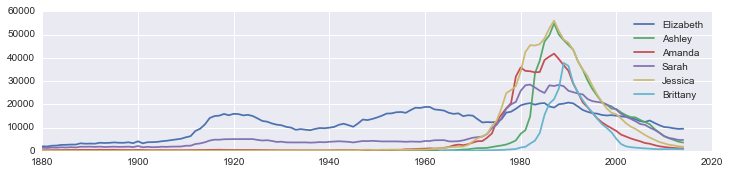

In [51]:
pp.figure(figsize=(12,2.5))

for name in popular:
    plotname('F',name)
    
pp.legend(popular)

In [52]:
allyears.groupby(['sex', 'name']).sum().head()

number   year
sex name                    
F   Aabha          21   6037
    Aabriella      10   4022
    Aaden           5   2009
    Aadhira        29   6039
    Aadhya        639  16084

In [53]:
allyears.groupby(['sex', 'name'])['number'].sum().head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [71]:
total = allyears.groupby(['sex', 'name'])['number'].sum()

In [55]:
def sumsq(x):
    return sum(x**2)

In [57]:
spikyness = allyears.groupby(['sex', 'name'])['number'].agg(sumsq)/total**2

In [58]:
spikyness.head()

sex  name     
F    Aabha        0.351474
     Aabriella    0.500000
     Aaden        1.000000
     Aadhira      0.362663
     Aadhya       0.262673
Name: number, dtype: float64

In [67]:
total_recent = allyears[allyears['year']>2005].groupby(['sex', 'name'])['number'].sum()

In [69]:
total_recent.head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

* Compute the number of times that each name was used, spearately for boys and girls
* Identify the unisex names where the ratio between the boys and girls totals is between 1:4 and 4:1
* Plot popularity vs. year for the top 10 unisex names

In [79]:
totals_bysex = total.unstack('sex')
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72
Aabha,21,NaN
Aabid,NaN,5
Aabriella,10,NaN
Aadam,NaN,196


In [80]:
totals_both = totals_bysex.sum(axis = 1)

In [81]:
totals_both.head()

name
Aaban         72
Aabha         21
Aabid          5
Aabriella     10
Aadam        196
dtype: float64

In [82]:
ratio = totals_bysex['F'] / totals_bysex['M']

In [83]:
unisex = (ratio > 0.25) & (ratio < 4)

In [90]:
totals_both = totals_both[unisex]
totals_both.sort(ascending=False)
totals_both.head(5)

C:\Users\Kai\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


name
Willie    593888
Jordan    479434
Taylor    416096
Leslie    376587
Jamie     350262
dtype: float64

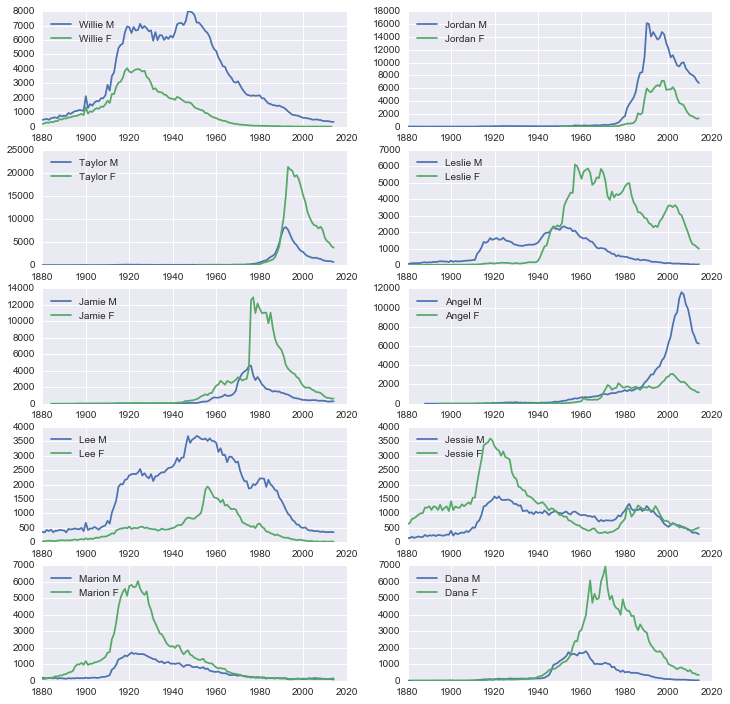

In [91]:
names = totals_both.head(10).index.values

pp.figure(figsize=(12,12))

for i,name in enumerate(names):
    pp.subplot(5,2,i+1)
    
    plotname('M',name)
    plotname('F',name)
    
    pp.legend([name + ' M',name + ' F'],loc='upper left')